In [418]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 1. Data Collection

In [302]:
# import the csv file for analysis
df = pd.read_csv('/Users/dworkum/Downloads/BMW sales data.csv')

In [304]:
# observe the first few rows of the dataframe
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


# 2. Data Wrangling

In [267]:
# check the deta types and null valiues using the .info function.
df.info() # there are no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
 11  Total_Revenue         50000 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 4.6+ MB


In [279]:
# are there duplicates>
df.duplicated().sum()

0

In [281]:
# check for null vlaues with .isna()
df.isna().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
Total_Revenue           0
dtype: int64

### There are no null values, no duplicates and the dtypes for each columns is right. The data is ready for analysis.

# 3. Exploratory Data Analysis (EDA)

In [317]:
# determine the describe statstics for the numerical colums
numerical_columns = [col for col in df.columns 
                    if df[col].dtype in ['float64','int64']]
numerical_columns

['Year',
 'Engine_Size_L',
 'Mileage_KM',
 'Price_USD',
 'Sales_Volume',
 'Total_Revenue']

In [319]:
# determine the summary statstics for the numerical columns.
df[numerical_columns].describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Total_Revenue
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680,3.802449e+08
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125,2.623406e+08
min,2010.000000,1.500000,3.000000,30000.000000,100.000000,3.410472e+06
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000,1.689871e+08
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000,3.318010e+08
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000,5.486494e+08
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000,1.194346e+09


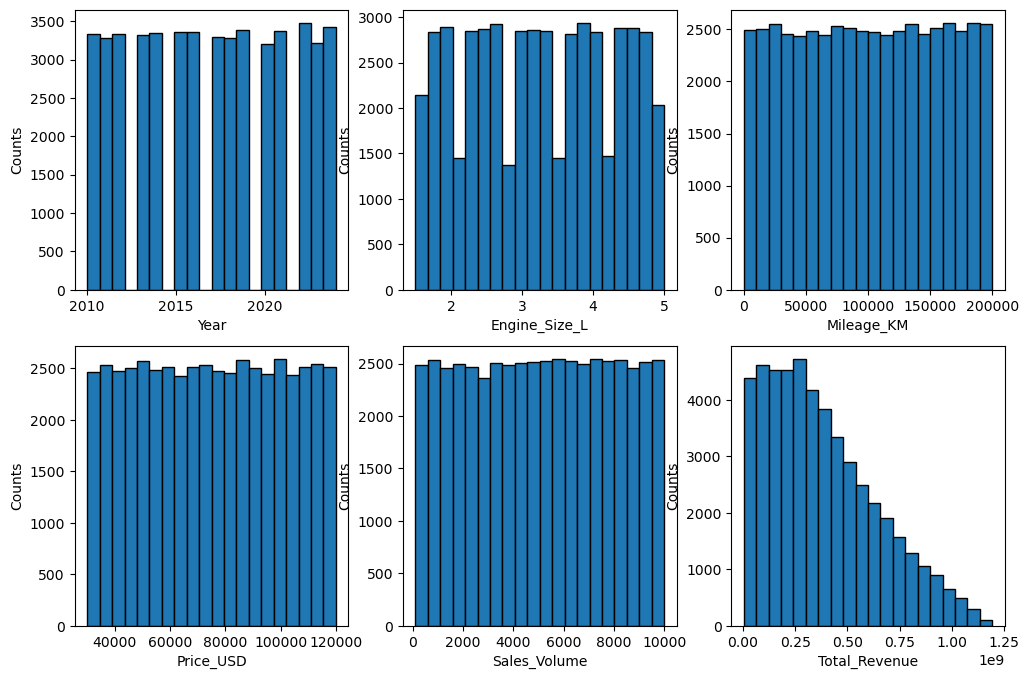

In [327]:
# visualize the distribution of the numerical columns
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()

for i, col in enumerate(numerical_columns):
  axs[i].hist(df[col], bins=20, edgecolor='black')
  axs[i].set_xlabel(col)
  axs[i].set_ylabel('Counts')

# 4. Feature Engineering

In [459]:
# calculate the total revenue from the sale of each model every year.
df['Total_Revenue'] = df['Sales_Volume'] * df['Price_USD']
df1 = df.sort_values(by=['Model','Year','Region','Color','Fuel_Type','Transmission'], ascending=True)
df1.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Total_Revenue
19829,3 Series,2010,Africa,Black,Diesel,Automatic,2.3,159207,59605,5940,Low,354053700
42741,3 Series,2010,Africa,Black,Electric,Automatic,4.8,62371,106465,1647,Low,175347855
18311,3 Series,2010,Africa,Black,Electric,Manual,4.4,33253,38318,7180,High,275123240
15396,3 Series,2010,Africa,Black,Hybrid,Manual,4.4,150968,42098,6508,Low,273973784
22643,3 Series,2010,Africa,Black,Petrol,Automatic,1.6,55672,76844,6978,Low,536217432


### The mean and median are almost similar. However, the distribution does not follow the gaussian model. 

In [396]:
# encode the categorical columns with one-hot encoding.
categorical_columns = [col for col in df.columns
                       if df[col].dtype == 'object']
categorical_columns

['Model',
 'Region',
 'Color',
 'Fuel_Type',
 'Transmission',
 'Sales_Classification']

In [412]:
# encode the categorical columns.
df_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True).drop(columns=['Total_Revenue','Year'])
df_dummies.head()

,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Model_5 Series,Model_7 Series,Model_M3,Model_M5,Model_X1,Model_X3,...,Color_Blue,Color_Grey,Color_Red,Color_Silver,Color_White,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Sales_Classification_Low
0,3.5,151748,98740,8300,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False
1,1.6,121671,79219,3428,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
2,4.5,10991,113265,6994,True,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
3,1.7,27255,60971,4047,False,False,False,False,False,True,...,True,False,False,False,False,False,False,True,False,True
4,2.1,122131,49898,3080,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [424]:
# scale the values in the df_dummies
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df_dummies),columns=df_dummies.columns)
scaled_df.head()

,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Model_5 Series,Model_7 Series,Model_M3,Model_M5,Model_X1,Model_X3,...,Color_Blue,Color_Grey,Color_Red,Color_Silver,Color_White,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Sales_Classification_Low
0,0.571429,0.758752,0.763795,0.828367,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.028571,0.608361,0.546890,0.336196,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.857143,0.054942,0.925187,0.696434,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.057143,0.136265,0.344130,0.398727,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.171429,0.610661,0.221094,0.301041,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


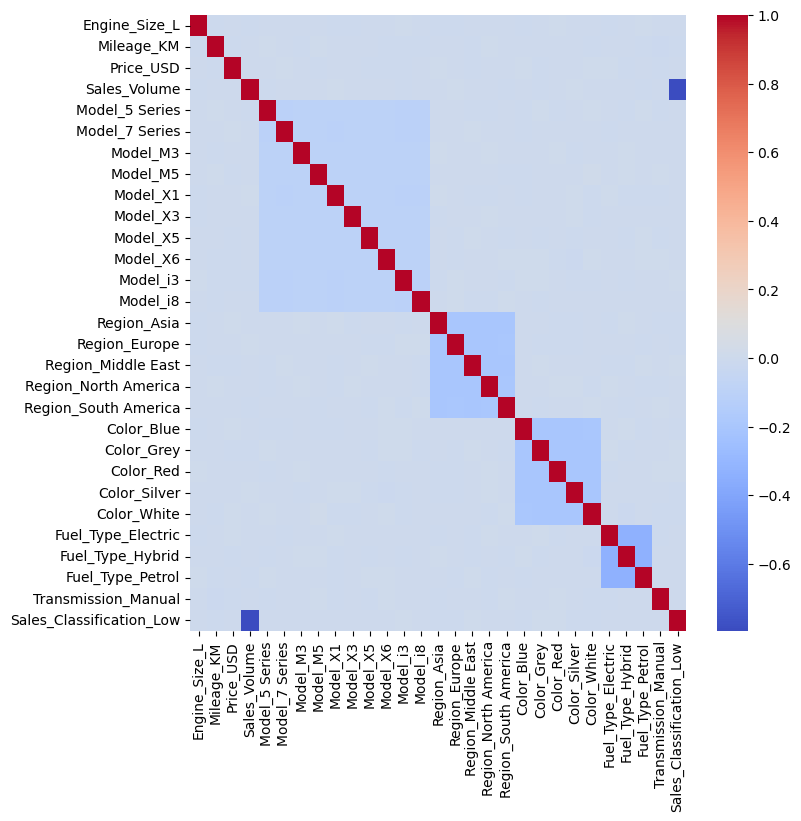

In [436]:
# scale the values
plt.figure(figsize=(8,8))
sns.heatmap(data=scaled_df.corr(), cmap='coolwarm')
plt.show()

# 5. Data Analysis

### 1. How the total sale volume and revenues progressed over 15 years from 2010 to 2024.

In [225]:
# Count the number of car sales per year.
sales_per_year = df.groupby(['Year'])[['Sales_Volume','Total_Revenue']].sum().reset_index()
sales_per_year['lag_car_sold'] = sales_per_year['Sales_Volume'].shift(1)
sales_per_year['lag_revenue'] = sales_per_year['Total_Revenue'].shift(1)
sales_per_year.head()

,Year,Sales_Volume,Total_Revenue,lag_car_sold,lag_revenue
0,2010,16933445,1261631480830,NaN,NaN
1,2011,16758941,1258944308614,16933445.0,1.261631e+12
2,2012,16751895,1257840248199,16758941.0,1.258944e+12
3,2013,16866733,1258599026870,16751895.0,1.257840e+12
4,2014,16958960,1269989867142,16866733.0,1.258599e+12


In [227]:
# calculate the % chenge in the number of cars sold compared to the previous year.
def percent_change(row):
    X = row['Sales_Volume']
    Y = row['lag_car_sold']
    if pd.isna(Y):
        return np.nan 
    else:
        return ((X - Y)/ X) * 100

sales_per_year['perc_change_sales'] = sales_per_year.apply(percent_change, axis=1)

In [229]:
def percent_change(row):
    X = row['Total_Revenue']
    Y = row['lag_revenue']
    if pd.isna(Y):
        return np.nan 
    else:
        return ((X - Y)/ X) * 100

sales_per_year['perc_change_revenue'] = sales_per_year.apply(percent_change, axis=1)

In [231]:
sales_per_year.head()

,Year,Sales_Volume,Total_Revenue,lag_car_sold,lag_revenue,perc_change_sales,perc_change_revenue
0,2010,16933445,1261631480830,NaN,NaN,NaN,NaN
1,2011,16758941,1258944308614,16933445.0,1.261631e+12,-1.041259,-0.213446
2,2012,16751895,1257840248199,16758941.0,1.258944e+12,-0.042061,-0.087774
3,2013,16866733,1258599026870,16751895.0,1.257840e+12,0.680855,0.060288
4,2014,16958960,1269989867142,16866733.0,1.258599e+12,0.543825,0.896924


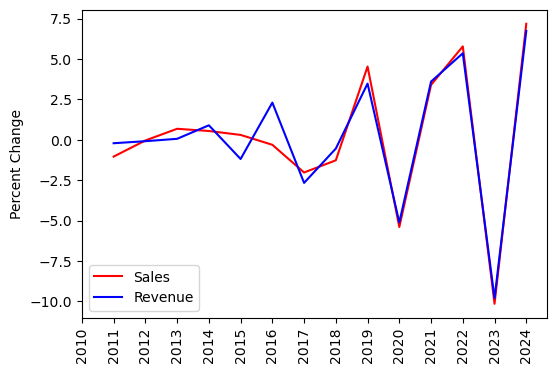

In [263]:
plt.figure(figsize=(6,4))
sns.lineplot(data=sales_per_year, x='Year', y='perc_change_sales', color='red', label='Sales')
sns.lineplot(data=sales_per_year, x='Year', y='perc_change_revenue', color='blue', label='Revenue')
plt.ylabel('Percent Change')
plt.legend(loc='lower left')
plt.xticks(sales_per_year['Year'].unique(),rotation=90)
plt.xlabel('')
plt.show()

### The total cars sale fall down by 5 to 10 % in 2020 and 2023, respectively, compared to the previous years. The market improved by 7.5 percent in 2024. The total revenue also show a similar pattern. In 2016, despite a slight decrease in sales volume of cars, there was an increase in total revenue.

### 2. Which model of car generated the highest average revenue over years and how the need of that model changed over years?

In [496]:
# how is the average price of each model?
average_price_model = df.groupby('Model')[['Price_USD','Sales_Volume','Total_Revenue']].mean().reset_index().round(2)
#average_price_model['average_revenue'] = (average_price_model['Total_Revenue'] / 15).round(2)
avg_revenue_model = average_price_model.sort_values(by='Total_Revenue', ascending=False)
#avg_revenue_model['lag_avg_revenue'] = avg_revenue_model['Total_Revenue'].shift(1)
#avg_revenue_model['difference_revenue'] = ((avg_revenue_model['Total_Revenue'] - avg_revenue_model['lag_avg_revenue']) / avg_revenue_model['lag_avg_revenue']) * 100
avg_revenue_model

,Model,Price_USD,Sales_Volume,Total_Revenue
0,3 Series,75566.23,5066.66,3.848823e+08
2,7 Series,75570.20,5097.83,3.836413e+08
5,X1,75262.22,5121.68,3.835854e+08
10,i8,75366.27,5085.52,3.831401e+08
7,X5,74708.12,5061.23,3.808008e+08
6,X3,75016.62,5057.93,3.797979e+08
4,M5,74474.93,5087.02,3.792915e+08
8,X6,74434.60,5060.74,3.781651e+08
1,5 Series,75287.84,5029.95,3.779862e+08
3,M3,74841.59,5064.51,3.778619e+08


### The average price and Sales volume is not greatly different between the different models.

### 3. Which region has the highest average purchase in 15 years?

In [510]:
# Which region has the best average purchase rate
purchase_region = df.groupby(['Region'])[['Sales_Volume','Total_Revenue']].mean().sort_values(by='Total_Revenue', ascending=False).reset_index()
purchase_region.columns = ['regions','avg_sales','avg_revenue']
purchase_region['percentage'] = (purchase_region['avg_revenue'] / purchase_region['avg_revenue'][0] ) * 100
purchase_region.round(2)

,regions,avg_sales,avg_revenue,percentage
0,Asia,5083.31,3.845086e+08,100.00
1,Europe,5106.21,3.825389e+08,99.49
2,North America,5087.30,3.818763e+08,99.32
3,Middle East,5055.13,3.783332e+08,98.39
4,South America,5035.97,3.773852e+08,98.15
5,Africa,5036.38,3.767114e+08,97.97


### In the last 15 years the Asia market generated the highest average revenue with Africa market contributing the least. However, there is only a 2% difference between the highest and the lowest market.

In [465]:
# define a function that take the region as an arguement and filters the datapoints to then calculate the sales.
def sales_all_regions(df):
    all_sales = df.groupby(['Year','Region'])['Total_Revenue'].sum().reset_index(name='total_revenue')
    # all_sales_pivoted = all_sales.pivot(index='Year', columns ='Region', values ='Total_USD').reset_index()
    return all_sales
sales_all_regions(df)
    

,Year,Region,total_revenue
0,2010,Africa,212551009923
1,2010,Asia,215391284804
2,2010,Europe,208509880885
3,2010,Middle East,196026969635
4,2010,North America,212678774685
...,...,...,...
85,2024,Asia,235262595372
86,2024,Europe,218045728726
87,2024,Middle East,220808953215
88,2024,North America,220474534036


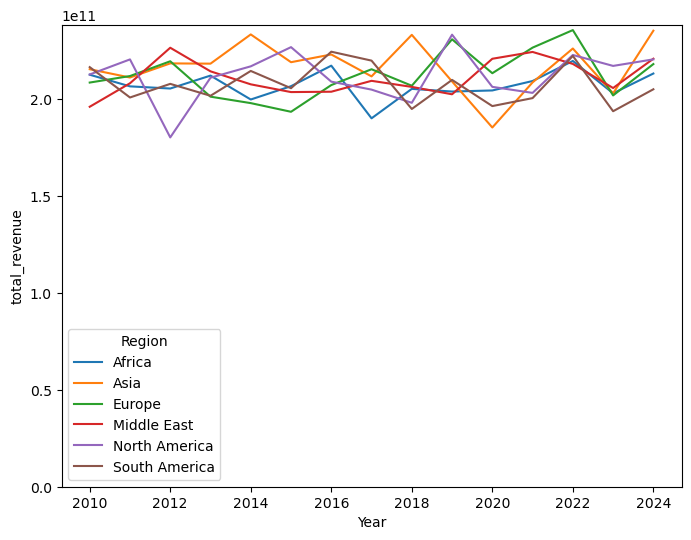

In [513]:
# plot the sale trends in line graph
plt.figure(figsize=(8,6))
sns.lineplot(data=sales_all_regions(df), x='Year', y='total_revenue', hue='Region')
plt.ylim(0, )
plt.show()

### There is no continous growth or reduction over years in each region. It follows a zigzag pattern.

In [522]:
# count the number of cars sold per transmission type
cars_transmission = df.groupby(['Region','Transmission'])['Sales_Volume'].mean().reset_index().round(2)
cars_transmission

,Region,Transmission,Sales_Volume
0,Africa,Automatic,5007.83
1,Africa,Manual,5064.86
2,Asia,Automatic,5083.78
3,Asia,Manual,5082.83
4,Europe,Automatic,5121.74
5,Europe,Manual,5091.04
6,Middle East,Automatic,5072.59
7,Middle East,Manual,5038.02
8,North America,Automatic,5112.59
9,North America,Manual,5061.95


### 4. Which factor influence the highest the price of the car and its sale volume?

In [553]:
# identify the categorical features
categorical_features = [col for col in df.columns if df[col].dtype == 'object']
# identify the independent and dependent variables
X = df[categorical_features]
y = df['Price_USD']
# encode the categorical features into numbers using One Hot Coding.
X_dummies = pd.get_dummies(X)
X_dummies = X_dummies.astype(int)
X_dummies.head()

,Model_3 Series,Model_5 Series,Model_7 Series,Model_M3,Model_M5,Model_X1,Model_X3,Model_X5,Model_X6,Model_i3,...,Color_Silver,Color_White,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Sales_Classification_High,Sales_Classification_Low
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [569]:
# import from the Scikitlearn the linear regression model.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(X_dummies, y)
y_pred = model.predict(X_dummies)
r2_value = r2_score(y, y_pred)
r2_value

0.0003907280643606903

### The R2 score shows that no feature is influential.

### 5. How the cars with fuel type vary over years? 

In [589]:
sales_fueltype = df.groupby(['Year','Fuel_Type'])[['Sales_Volume','Total_Revenue']].mean().reset_index().round(2)
sales_fueltype_pivoted = sales_fueltype.pivot(index='Year', columns='Fuel_Type', values=['Sales_Volume','Total_Revenue'])
sales_fueltype_pivoted

Sales_Volume                            Total_Revenue                \
Fuel_Type       Diesel Electric   Hybrid   Petrol        Diesel      Electric   
Year                                                                            
2010           4929.80  5024.56  5345.78  5042.33  3.755926e+08  3.635416e+08   
2011           5081.37  5167.11  5044.57  5156.66  3.861881e+08  3.815887e+08   
2012           5167.16  5142.38  4940.69  4873.69  3.899357e+08  3.900677e+08   
2013           5151.44  5015.29  5075.32  5043.99  3.832181e+08  3.816159e+08   
2014           5221.84  4966.40  5108.69  4937.27  3.947801e+08  3.758870e+08   
2015           5222.46  5103.04  4956.30  4993.53  3.749553e+08  3.872378e+08   
2016           5061.91  4946.86  5050.55  5098.13  3.803365e+08  3.740221e+08   
2017           5033.59  5007.67  5133.73  5032.75  3.736429e+08  3.763228e+08   
2018           4859.72  5035.56  5007.49  5120.34  3.755095e+08  3.804808e+08   
2019           5080.02  5066.05  5018.85  5110.42  3.806872e+08  3.847778e+08   
2020           5100.95  5009.57  5163.53  5083.49  3.805499e+08  3.782304e+08   
2021           4919.39  5035.19  4978.70  5099.35  3.734230e+08  3.777474e+08   
2022           5214.60  5188.06  5190.99  5017.71  3.926564e+08  3.915262e+08   
2023           5103.33  5125.66  4943.13  5044.80  3.864232e+08  3.850562e+08   
2024           5125.26  5126.28  5169.29  5033.87  3.817784e+08  3.859298e+08   

                                       
Fuel_Type        Hybrid        Petrol  
Year                                   
2010       3.942254e+08  3.822802e+08  
2011       3.809789e+08  3.877306e+08  
2012       3.620162e+08  3.696423e+08  
2013       3.783881e+08  3.707066e+08  
2014       3.802424e+08  3.642194e+08  
2015       3.669358e+08  3.665602e+08  
2016       3.853720e+08  3.873964e+08  
2017       3.864022e+08  3.846026e+08  
2018       3.787572e+08  3.836901e+08  
2019       3.769590e+08  3.783737e+08  
2020       3.877727e+08  3.843157e+08  
2021       3.656441e+08  3.933823e+08  
2022       3.862000e+08  3.760898e+08  
2023       3.683222e+08  3.818195e+08  
2024       3.896975e+08  3.744770e+08